# Exploratory Data Analysis 

### Imports

In [1]:
import pandas as pd
import seaborn as sns

### Read Data

Data dictionary is available [here](https://nflreadr.nflverse.com/articles/dictionary_pbp.html).

In [2]:
%%time

play_data = pd.read_csv('data/play_by.csv', low_memory=False, parse_dates=['game_date'])

CPU times: user 7.99 s, sys: 2.42 s, total: 10.4 s
Wall time: 11.1 s


In [3]:
third_down = play_data.loc[play_data.down == 3]

In [4]:
third_down.shape

(73931, 255)

In [5]:
third_down.third_down_converted.value_counts()

0.0    47681
1.0    26140
Name: third_down_converted, dtype: int64

In [6]:
third_down.third_down_failed.value_counts()

1.0    41354
0.0    32467
Name: third_down_failed, dtype: int64

In [7]:
first_down = play_data.loc[(play_data.down == 1) & (play_data.ydstogo < 10)]

In [8]:
first_down.ydstogo.value_counts()

5    1934
1    1515
9     960
8     867
6     854
7     815
4     810
3     785
2     780
Name: ydstogo, dtype: int64

In [16]:
print(f'Third downs converted: {round(third_down.third_down_converted.mean()*100, 2)}%')

Third downs converted: 35.41%


In [9]:
third_down.groupby('third_down_converted').ydstogo.mean()

third_down_converted
0.0    8.272750
1.0    5.234277
Name: ydstogo, dtype: float64

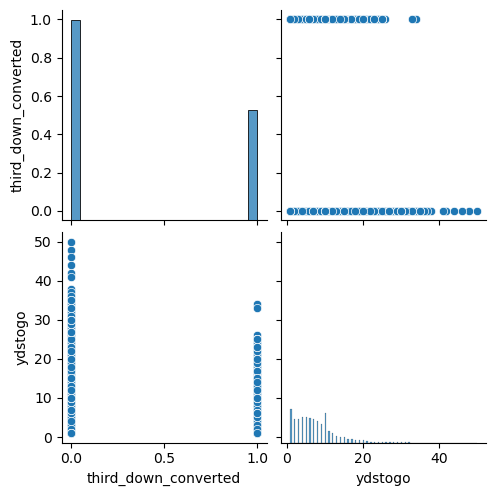

In [10]:
sns.pairplot(third_down[['third_down_converted', 'ydstogo']])

In [11]:
sample_data = third_down.sample(500, random_state=32).reset_index()
sample_data.to_csv('sample_data.csv')

In [12]:
for col in play_data.columns:
    print(col)

play_id
game_id
home_team
away_team
posteam
posteam_type
defteam
side_of_field
yardline_100
game_date
quarter_seconds_remaining
half_seconds_remaining
game_seconds_remaining
game_half
quarter_end
drive
sp
qtr
down
goal_to_go
time
yrdln
ydstogo
ydsnet
desc
play_type
yards_gained
shotgun
no_huddle
qb_dropback
qb_kneel
qb_spike
qb_scramble
pass_length
pass_location
air_yards
yards_after_catch
run_location
run_gap
field_goal_result
kick_distance
extra_point_result
two_point_conv_result
home_timeouts_remaining
away_timeouts_remaining
timeout
timeout_team
td_team
posteam_timeouts_remaining
defteam_timeouts_remaining
total_home_score
total_away_score
posteam_score
defteam_score
score_differential
posteam_score_post
defteam_score_post
score_differential_post
no_score_prob
opp_fg_prob
opp_safety_prob
opp_td_prob
fg_prob
safety_prob
td_prob
extra_point_prob
two_point_conversion_prob
ep
epa
total_home_epa
total_away_epa
total_home_rush_epa
total_away_rush_epa
total_home_pass_epa
total_away_pass_e